The task is to forecast the total amount of products sold in every shop for the test set.

******File descriptions**

sales_train.csv - 2013~15년 자료

test.csv - 15년 11월 자료

sample_submission.csv - 그냥 제출 연습용

items.csv - 아이템과 제품에 대한 supplement information

item_categories.csv  - 아이템 카테고리

shops.csv- shop의 supplement info

**Data fields (데이터 안의 column들)**

ID - an Id that represents a (Shop, Item) tuple within the test set

shop_id - unique identifier of a shop

item_id - unique identifier of a product

item_category_id - unique identifier of item category

item_cnt_day - number of products sold. You are predicting a monthly amount of this measure

item_price - current price of an item

date - date in format dd/mm/yyyy

date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 
2015 is 33

item_name - name of item

shop_name - name of shop

item_category_name - name of item category

In [65]:
!ls ../input/*

item_categories.csv  sales_train.csv	    shops.csv
items.csv	     sample_submission.csv  test.csv


기본적으로 무슨 내용이 있는가~ 를 알아보는 코드

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sales = pd.read_csv("../input/competitive-data-science-predict-future-sales/sales_train.csv")

다른 곳에서 matplot 쓰던데 나는 쓸즐 모르겠다

ㅋㅋ 이거 받는데 중간에 route가 이상해서 제대로 못찾아서 헤맴ㅋㅋ 실화냐

In [132]:
item_cat=pd.read_csv("../input/competitive-data-science-predict-future-sales/item_categories.csv")
item=pd.read_csv("../input/competitive-data-science-predict-future-sales/items.csv")
sub=pd.read_csv("../input/competitive-data-science-predict-future-sales/sample_submission.csv")
shops=pd.read_csv("../input/competitive-data-science-predict-future-sales/shops.csv")
test=pd.read_csv("../input/competitive-data-science-predict-future-sales/test.csv")
categories = pd.read_csv('../input/competitive-data-science-predict-future-sales/item_categories.csv')

input 다 받음 ^오^

In [68]:
sales.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


pandas 배운거 복습 해볼겸 해봤는데 잘 돌아가고, 저장이 잘 된 것을 알 수 있다. moving on

In [69]:
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


분석 해보자면, date block num -> 각각이 새로운 달을 의미하며,

In [70]:
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None


In [71]:
item_cat

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [72]:
item

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


아이템에서 아이템 카테고리별로 총 개수 정렬을 해보자

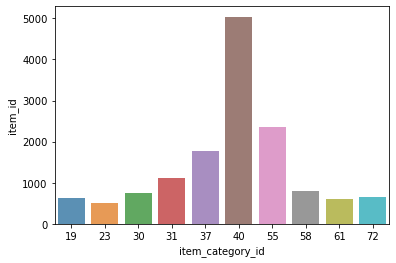

In [73]:
x=item.groupby(['item_category_id']).count()
x=x.sort_values(by='item_id',ascending=False)
x=x.iloc[0:10].reset_index()
x
ax= sns.barplot(x.item_category_id, x.item_id, alpha=0.8)

아이템 카테고리별 개수 계산 가능

Idea => 모든 카테고리별로 없는 빈칸은 0으로 채우기 그래서 계산하면 훨씬 용이할 것 (각 지점마다 있는 것 없는것 있으므로 없는 칸은 다 0으로 initialize)
그 후에
1. 간단한 방법으로 지금까지의 평균을 내는 방법
2. 

In [74]:
sub

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5


In [75]:
sum(sales.duplicated())

6

중복 내용이 있으니 지워줘야 함. 나중에 merge 문제 가능

In [76]:
sales[sales.duplicated() == True]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76962,05.01.2013,0,54,20130,149.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0
2198566,31.12.2014,23,42,21619,499.0,1.0


In [77]:
sales.drop_duplicates(inplace = True)

In [78]:
sales.date

0          02.01.2013
1          03.01.2013
2          05.01.2013
3          06.01.2013
4          15.01.2013
              ...    
2935844    10.10.2015
2935845    09.10.2015
2935846    14.10.2015
2935847    22.10.2015
2935848    03.10.2015
Name: date, Length: 2935843, dtype: object

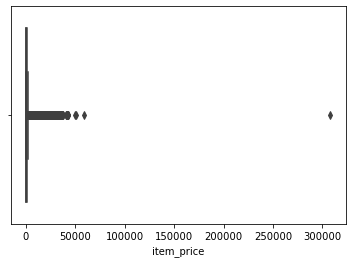

In [79]:
sns.boxplot(x=sales.item_price)

이거 보니까 item price 하나가 너무 튀어나가서 30만짜리 지워야 됨.. 객관성을 위해서

In [80]:
sales = sales[sales.item_price <100000]

굿이에요 굿!

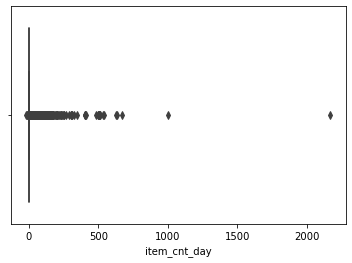

In [81]:
sns.boxplot(x= sales.item_cnt_day)

여기서 item cnt day가 2000일 넘는건 불가능함.. 그리고 음수인 것도 말이 안됨.. 고로 다 지워줘야 함

In [82]:
sales = sales[sales.item_cnt_day < 800]

In [83]:
sales = sales[sales.item_cnt_day > 0]

In [84]:
sales = sales[sales.item_price >= 0]

In [85]:
#item.drop(['item_name'], axis = 1, inplace = True)

In [86]:
len(test.item_id)

214200

In [87]:
len(set(test.item_id)-set(sales.item_id))

363

item_id 가 실제 테스트랑 다른게 363개가 있다. 고로, 0으로 채워야 함!
그리고 총 매출을 보자..

In [88]:
sales['revenue'] = sales['item_price']* sales['item_cnt_day']

In [89]:
sales['revenue']

0           999.00
1           899.00
3          1709.05
4          1099.00
5           349.00
            ...   
2935844     299.00
2935845     299.00
2935846     349.00
2935847     299.00
2935848     299.00
Name: revenue, Length: 2928483, dtype: float64

In [90]:
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
0,02.01.2013,0,59,22154,999.00,1.0,999.00
1,03.01.2013,0,25,2552,899.00,1.0,899.00
3,06.01.2013,0,25,2554,1709.05,1.0,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,1099.00
5,10.01.2013,0,25,2564,349.00,1.0,349.00
...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,299.00
2935845,09.10.2015,33,25,7460,299.00,1.0,299.00
2935846,14.10.2015,33,25,7459,349.00,1.0,349.00
2935847,22.10.2015,33,25,7440,299.00,1.0,299.00


이제 새로 table을 생성해야 함.

In [91]:
answer = []

In [92]:
sales['date_block_num']
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
0,02.01.2013,0,59,22154,999.00,1.0,999.00
1,03.01.2013,0,25,2552,899.00,1.0,899.00
3,06.01.2013,0,25,2554,1709.05,1.0,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,1099.00
5,10.01.2013,0,25,2564,349.00,1.0,349.00
...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,299.00
2935845,09.10.2015,33,25,7460,299.00,1.0,299.00
2935846,14.10.2015,33,25,7459,349.00,1.0,349.00
2935847,22.10.2015,33,25,7440,299.00,1.0,299.00


In [93]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [94]:
test['date_block_num'] = 34

In [95]:
test

,ID,shop_id,item_id,date_block_num
0,0,5,5037,34
1,1,5,5320,34
2,2,5,5233,34
3,3,5,5232,34
4,4,5,5268,34
...,...,...,...,...
214195,214195,45,18454,34
214196,214196,45,16188,34
214197,214197,45,15757,34
214198,214198,45,19648,34


마지막 달이니까 date block num =34
이제 answer에 

여기서부터 남의 코드입니다아아아아아아아아아아아아아아......

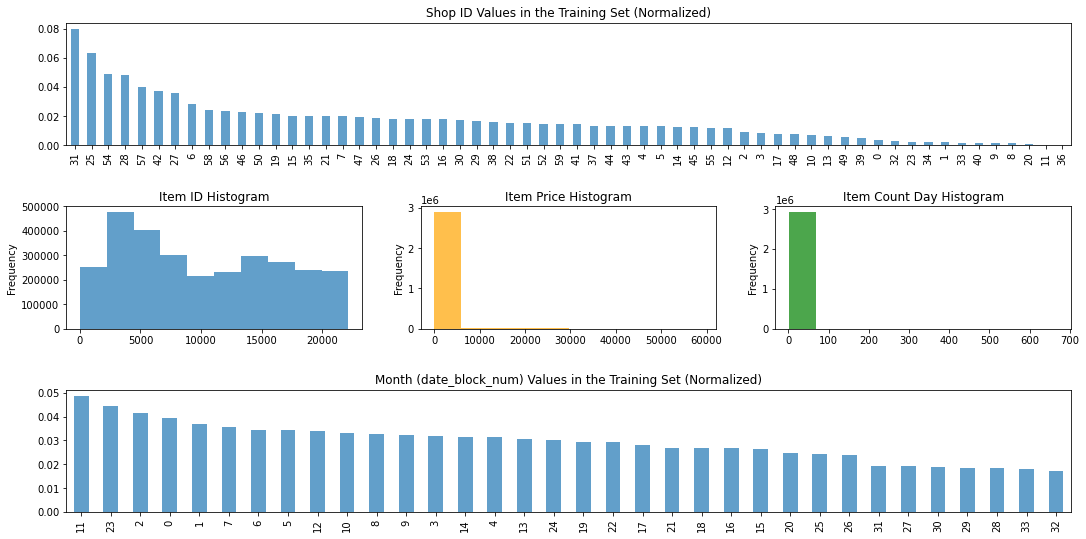

In [96]:
fig = plt.figure(figsize=(18,9))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0), colspan = 3)
sales['shop_id'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('Shop ID Values in the Training Set (Normalized)')

plt.subplot2grid((3,3), (1,0))
sales['item_id'].plot(kind='hist', alpha=0.7)
plt.title('Item ID Histogram')

plt.subplot2grid((3,3), (1,1))
sales['item_price'].plot(kind='hist', alpha=0.7, color='orange')
plt.title('Item Price Histogram')

plt.subplot2grid((3,3), (1,2))
sales['item_cnt_day'].plot(kind='hist', alpha=0.7, color='green')
plt.title('Item Count Day Histogram')

plt.subplot2grid((3,3), (2,0), colspan = 3)
sales['date_block_num'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('Month (date_block_num) Values in the Training Set (Normalized)')

plt.show()

In [97]:
sales[sales['item_price']==-1]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue


In [98]:
shops_train = sales['shop_id'].nunique()
shops_test = test['shop_id'].nunique()
print(shops_train)
print(shops_test)

60
42


In [99]:
shops_train_list = list(sales['shop_id'].unique())
shops_test_list = list(test['shop_id'].unique())

flag = 0
if(set(shops_test_list).issubset(set(shops_train_list))): 
    flag = 1
      
if (flag) : 
    print ("Yes, list is subset of other.") 
else : 
    print ("No, list is not subset of other.") 

Yes, list is subset of other.


shop이름이 같을수 있음

In [100]:
shops.T

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
shop_name,"!Якутск Орджоникидзе, 56 фран","!Якутск ТЦ ""Центральный"" фран","Адыгея ТЦ ""Мега""","Балашиха ТРК ""Октябрь-Киномир""","Волжский ТЦ ""Волга Молл""","Вологда ТРЦ ""Мармелад""","Воронеж (Плехановская, 13)","Воронеж ТРЦ ""Максимир""","Воронеж ТРЦ Сити-Парк ""Град""",Выездная Торговля,...,"Тюмень ТЦ ""Гудвин""","Тюмень ТЦ ""Зеленый Берег""","Уфа ТК ""Центральный""","Уфа ТЦ ""Семья"" 2","Химки ТЦ ""Мега""",Цифровой склад 1С-Онлайн,"Чехов ТРЦ ""Карнавал""","Якутск Орджоникидзе, 56","Якутск ТЦ ""Центральный""","Ярославль ТЦ ""Альтаир"""
shop_id,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59


In [101]:
sales.loc[sales['shop_id'] == 0, 'shop_id'] = 57
test.loc[test['shop_id'] == 0, 'shop_id'] = 57

sales.loc[sales['shop_id'] == 1, 'shop_id'] = 58
test.loc[test['shop_id'] == 1, 'shop_id'] = 58

sales.loc[sales['shop_id'] == 10, 'shop_id'] = 11
test.loc[test['shop_id'] == 10, 'shop_id'] = 11

In [102]:
cities = shops['shop_name'].str.split(' ').map(lambda row: row[0])
cities.unique()

array(['!Якутск', 'Адыгея', 'Балашиха', 'Волжский', 'Вологда', 'Воронеж',
       'Выездная', 'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга',
       'Коломна', 'Красноярск', 'Курск', 'Москва', 'Мытищи', 'Н.Новгород',
       'Новосибирск', 'Омск', 'РостовНаДону', 'СПб', 'Самара', 'Сергиев',
       'Сургут', 'Томск', 'Тюмень', 'Уфа', 'Химки', 'Цифровой', 'Чехов',
       'Якутск', 'Ярославль'], dtype=object)

!만 붙고 city가 같을수 있음

In [103]:
shops['city'] = shops['shop_name'].str.split(' ').map(lambda row: row[0])
shops.loc[shops.city == '!Якутск', 'city'] = 'Якутск'

In [104]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit_transform(shops['city'])

array([29, 29,  0,  1,  2,  3,  4,  4,  4,  5,  6,  6,  7,  8,  8,  9, 10,
       11, 11, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14,
       15, 15, 16, 16, 17, 18, 18, 18, 19, 19, 20, 20, 21, 22, 23, 24, 24,
       24, 25, 25, 26, 27, 28, 29, 29, 30])

어려운 이름 대신 label encoder씀

In [105]:
shops['city_label'] = le.fit_transform(shops['city'])
shops.drop(['shop_name', 'city'], axis = 1, inplace = True)
shops.head()

,shop_id,city_label
0,0,29
1,1,29
2,2,0
3,3,1
4,4,2


item analysis

In [106]:
items_train = sales['item_id'].nunique()
items_test = test['item_id'].nunique()
print('Items in Training Set: ', items_train)
print('Items in Test Set: ', items_test)

Items in Training Set:  21803
Items in Test Set:  5100


In [107]:
items_train_list = list(sales['item_id'].unique())
items_test_list = list(test['item_id'].unique())

flag = 0
if(set(items_test_list).issubset(set(items_train_list))): 
    flag = 1
      
if (flag) : 
    print ("Yes, list is subset of other.") 
else : 
    print ("No, list is not subset of other.") 

No, list is not subset of other.


In [108]:
len(set(items_test_list).difference(items_train_list))

363

In [109]:
categories_in_test = item.loc[item['item_id'].isin(sorted(test['item_id'].unique()))].item_category_id.unique()

In [110]:
sales['date'] =  pd.to_datetime(sales['date'], format='%d.%m.%Y')

In [111]:
from itertools import product # 이게 뭐지?
shops_in_jan = sales.loc[sales['date_block_num']==0, 'shop_id'].unique()
items_in_jan = sales.loc[sales['date_block_num']==0, 'item_id'].unique()
jan = list(product(*[shops_in_jan, items_in_jan, [0]]))

In [112]:
print(len(jan)) # 364950칸의 표가 만들어질수 있음

364950


흐으음...

In [113]:
x = sales.groupby(['shop_id', 'item_id', 'date_block_num'])['item_cnt_day'].sum().rename('item_cnt_month').reset_index()
x.head()

,shop_id,item_id,date_block_num,item_cnt_month
0,2,27,0,1.0
1,2,27,17,1.0
2,2,30,2,1.0
3,2,30,5,1.0
4,2,30,15,1.0


In [114]:
months = sales['date_block_num'].unique()
cartesian = []
for month in months:
    shops_in_month = sales.loc[sales['date_block_num']==month, 'shop_id'].unique()
    items_in_month = sales.loc[sales['date_block_num']==month, 'item_id'].unique()
    cartesian.append(np.array(list(product(*[shops_in_month, items_in_month, [month]])), dtype='int32'))

In [115]:
cartesian_df = pd.DataFrame(np.vstack(cartesian), columns = ['shop_id', 'item_id', 'date_block_num'], dtype=np.int32)
new_train = pd.merge(cartesian_df, x, on=['shop_id', 'item_id', 'date_block_num'], how='left').fillna(0)

새로 만드려고 하는데, 빈칸은NAN으로 표시해서 0으로 채워줘야 함

In [116]:
new_train['item_cnt_month'] = np.clip(new_train['item_cnt_month'], 0, 20)

clip => 범주를 벗어나는 것은 범주 안의 좌우측 edge 취급

In [117]:
new_train.sort_values(['date_block_num','shop_id','item_id'], inplace = True)
new_train.head()

,shop_id,item_id,date_block_num,item_cnt_month
114838,2,19,0,0.0
117076,2,27,0,1.0
120551,2,28,0,0.0
118242,2,29,0,0.0
114531,2,32,0,0.0


In [118]:
test['item_cnt_month'] = 0

In [119]:
test.head()

,ID,shop_id,item_id,date_block_num,item_cnt_month
0,0,5,5037,34,0
1,1,5,5320,34,0
2,2,5,5233,34,0
3,3,5,5232,34,0
4,4,5,5268,34,0


In [120]:
new_train = new_train.append(test.drop('ID', axis = 1))

In [121]:
new_train = pd.merge(new_train, shops, on=['shop_id'], how='left')
new_train.head()

,shop_id,item_id,date_block_num,item_cnt_month,city_label
0,2,19,0,0.0,0
1,2,27,0,1.0,0
2,2,28,0,0.0,0
3,2,29,0,0.0,0
4,2,32,0,0.0,0


In [122]:
new_train = pd.merge(new_train, item.drop('item_name', axis = 1), on=['item_id'], how='left')
new_train.head()

,shop_id,item_id,date_block_num,item_cnt_month,city_label,item_category_id
0,2,19,0,0.0,0,40
1,2,27,0,1.0,0,19
2,2,28,0,0.0,0,30
3,2,29,0,0.0,0,23
4,2,32,0,0.0,0,40


In [133]:
categories_in_test = item.loc[item['item_id'].isin(sorted(test['item_id'].unique()))].item_category_id.unique()
# categories.loc[categories['item_category_id'].isin(categories_in_test)]
categories.loc[~categories['item_category_id'].isin(categories_in_test)].T

le = preprocessing.LabelEncoder()

main_categories = categories['item_category_name'].str.split('-')
categories['main_category_id'] = main_categories.map(lambda row: row[0].strip())
categories['main_category_id'] = le.fit_transform(categories['main_category_id'])

# Some items don't have sub-categories. For those, we will use the main category as a sub-category
categories['sub_category_id'] = main_categories.map(lambda row: row[1].strip() if len(row) > 1 else row[0].strip())
categories['sub_category_id'] = le.fit_transform(categories['sub_category_id'])



In [134]:
new_train = pd.merge(new_train, categories.drop('item_category_name', axis = 1), on=['item_category_id'], how='left')
new_train.head()

,shop_id,item_id,date_block_num,item_cnt_month,city_label,item_category_id,main_category_id,sub_category_id
0,2,19,0,0.0,0,40,11,4
1,2,27,0,1.0,0,19,5,10
2,2,28,0,0.0,0,30,8,55
3,2,29,0,0.0,0,23,5,16
4,2,32,0,0.0,0,40,11,4


237

In [139]:
def generate_lag(sales, months, lag_column):
    for month in months:
        # Speed up by grabbing only the useful bits
        train_shift = sales[['date_block_num', 'shop_id', 'item_id', lag_column]].copy()
        train_shift.columns = ['date_block_num', 'shop_id', 'item_id', lag_column+'_lag_'+ str(month)]
        train_shift['date_block_num'] += month
        train = pd.merge(sales, train_shift, on=['date_block_num', 'shop_id', 'item_id'], how='left')
    return train
import gc
gc.collect()

new_train = generate_lag(new_train, [1,2,3,4,5,6,12], 'item_cnt_month')

In [140]:
group = new_train.groupby(['date_block_num', 'item_id'])['item_cnt_month'].mean().rename('item_month_mean').reset_index()
new_train = pd.merge(new_train, group, on=['date_block_num', 'item_id'], how='left')
new_train = generate_lag(new_train, [1,2,3,6,12], 'item_month_mean')
new_train.drop(['item_month_mean'], axis=1, inplace=True)

여기서 시계열 분석이 들어갑니다.
1. 빈도


2. 추세
우상향 하는 그래프가 바로 추세 의미

3. 계절성
일정한 주기로 하는 것

4. 주기
일정하지 않은 빈도로 발생하는 패턴


variance가 비슷하면 계절성, 다르면 주기
5. 더미변수
휴일, 이벤트, 캠페인 아웃라이어 등 각 더미 값을 0,1로 채움. 1은 각 더미변수의 정의와 같음 ->?

6. 지연값 (lag)
** 여기서 lag를 추가했다 
lag는 지연된 값을 독립변수 반영, 과거의 x를 현재에 반영하고 싶을때, shift 이용하여 만듬
사사삭 사사삭 전의 내용을 통해 validation하도록 함

7. 시간변수



In [141]:
group = new_train.groupby(['date_block_num', 'shop_id'])['item_cnt_month'].mean().rename('shop_month_mean').reset_index()
new_train = pd.merge(new_train, group, on=['date_block_num', 'shop_id'], how='left')
new_train = generate_lag(new_train, [1,2,3,6,12], 'shop_month_mean')
new_train.drop(['shop_month_mean'], axis=1, inplace=True)

In [143]:
group = new_train.groupby(['date_block_num', 'shop_id', 'item_category_id'])['item_cnt_month'].mean().rename('shop_category_month_mean').reset_index()
new_train = pd.merge(new_train, group, on=['date_block_num', 'shop_id', 'item_category_id'], how='left')
new_train = generate_lag(new_train, [1, 2], 'shop_category_month_mean')
new_train.drop(['shop_category_month_mean'], axis=1, inplace=True)

In [144]:
group = new_train.groupby(['date_block_num', 'main_category_id'])['item_cnt_month'].mean().rename('main_category_month_mean').reset_index()
new_train = pd.merge(new_train, group, on=['date_block_num', 'main_category_id'], how='left')

new_train = generate_lag(new_train, [1], 'main_category_month_mean')
new_train.drop(['main_category_month_mean'], axis=1, inplace=True)

In [145]:
group = new_train.groupby(['date_block_num', 'sub_category_id'])['item_cnt_month'].mean().rename('sub_category_month_mean').reset_index()
new_train = pd.merge(new_train, group, on=['date_block_num', 'sub_category_id'], how='left')

new_train = generate_lag(new_train, [1], 'sub_category_month_mean')
new_train.drop(['sub_category_month_mean'], axis=1, inplace=True)

In [146]:
new_train['month'] = new_train['date_block_num'] % 12

In [147]:
holiday_dict = {
    0: 6,
    1: 3,
    2: 2,
    3: 8,
    4: 3,
    5: 3,
    6: 2,
    7: 8,
    8: 4,
    9: 8,
    10: 5,
    11: 4,
}

휴일 추가

In [148]:
new_train['holidays_in_month'] = new_train['month'].map(holiday_dict)

In [149]:
from tqdm import tqdm_notebook

def downcast_dtypes(df):
    '''
        Changes column types in the dataframe: 
                
                `float64` type to `float32`
                `int64`   type to `int32`
    '''
    
    # Select columns to downcast
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols =   [c for c in df if df[c].dtype == "int64"]
    
    # Downcast
    df[float_cols] = df[float_cols].astype(np.float16)
    df[int_cols]   = df[int_cols].astype(np.int16)
    
    return df

In [150]:
new_train = downcast_dtypes(new_train)

전처리 끝!

In [151]:
import xgboost as xgb
new_train = new_train[new_train.date_block_num > 11]
import gc
gc.collect()

15

1년 단위로 분석하는 것이 좋기 때문임 그래서 date > 11

In [152]:
def fill_na(df):
    for col in df.columns:
        if ('_lag_' in col) & (df[col].isnull().any()):
            df[col].fillna(0, inplace=True)         
    return df

new_train = fill_na(new_train)

In [153]:
def xgtrain():
    regressor = xgb.XGBRegressor(n_estimators = 5000,
                                 learning_rate = 0.01,
                                 max_depth = 10,
                                 subsample = 0.5,
                                 colsample_bytree = 0.5)
    
    regressor_ = regressor.fit(new_train[new_train.date_block_num < 33].drop(['item_cnt_month'], axis=1).values, 
                               new_train[new_train.date_block_num < 33]['item_cnt_month'].values, 
                               eval_metric = 'rmse', 
                               eval_set = [(new_train[new_train.date_block_num < 33].drop(['item_cnt_month'], axis=1).values, 
                                            new_train[new_train.date_block_num < 33]['item_cnt_month'].values), 
                                           (new_train[new_train.date_block_num == 33].drop(['item_cnt_month'], axis=1).values, 
                                            new_train[new_train.date_block_num == 33]['item_cnt_month'].values)
                                          ], 
                               verbose=True,
                               early_stopping_rounds = 50,
                              )
    return regressor_

In [154]:
%%time
regressor_ = xgtrain()

[15:36:59] WARNING: ../src/gbm/gbtree.cc:139: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	validation_0-rmse:1.20722	validation_1-rmse:1.15946
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:1.20531	validation_1-rmse:1.15709
[2]	validation_0-rmse:1.20368	validation_1-rmse:1.15439
[3]	validation_0-rmse:1.20209	validation_1-rmse:1.15253
[4]	validation_0-rmse:1.19978	validation_1-rmse:1.14969
[5]	validation_0-rmse:1.19804	validation_1-rmse:1.14716
[6]	validation_0-rmse:1.19637	validation_1-rmse:1.14520
[7]	validation_0-rmse:1.19358	validation_1-rmse:1.14288
[8]	validation_0-rmse:1.19112	validation_1-rmse:1.14080
[9]	validation_0-rmse:1.18860	validation_1-rmse:1.13857
[10]	validation_0-rmse:1.18626	validation_1-rmse:1.13612
[11]	validation

[137]	validation_0-rmse:1.03363	validation_1-rmse:1.01326
[138]	validation_0-rmse:1.03310	validation_1-rmse:1.01288
[139]	validation_0-rmse:1.03261	validation_1-rmse:1.01260
[140]	validation_0-rmse:1.03203	validation_1-rmse:1.01231
[141]	validation_0-rmse:1.03169	validation_1-rmse:1.01211
[142]	validation_0-rmse:1.03123	validation_1-rmse:1.01185
[143]	validation_0-rmse:1.03076	validation_1-rmse:1.01163
[144]	validation_0-rmse:1.03032	validation_1-rmse:1.01132
[145]	validation_0-rmse:1.02981	validation_1-rmse:1.01106
[146]	validation_0-rmse:1.02936	validation_1-rmse:1.01078
[147]	validation_0-rmse:1.02890	validation_1-rmse:1.01064
[148]	validation_0-rmse:1.02843	validation_1-rmse:1.01030
[149]	validation_0-rmse:1.02778	validation_1-rmse:1.01029
[150]	validation_0-rmse:1.02738	validation_1-rmse:1.01011
[151]	validation_0-rmse:1.02686	validation_1-rmse:1.00979
[152]	validation_0-rmse:1.02646	validation_1-rmse:1.00953
[153]	validation_0-rmse:1.02615	validation_1-rmse:1.00932
[154]	validati

[279]	validation_0-rmse:0.99072	validation_1-rmse:0.99454
[280]	validation_0-rmse:0.99061	validation_1-rmse:0.99448
[281]	validation_0-rmse:0.99029	validation_1-rmse:0.99444
[282]	validation_0-rmse:0.99005	validation_1-rmse:0.99439
[283]	validation_0-rmse:0.98991	validation_1-rmse:0.99435
[284]	validation_0-rmse:0.98959	validation_1-rmse:0.99420
[285]	validation_0-rmse:0.98938	validation_1-rmse:0.99411
[286]	validation_0-rmse:0.98926	validation_1-rmse:0.99407
[287]	validation_0-rmse:0.98886	validation_1-rmse:0.99410
[288]	validation_0-rmse:0.98857	validation_1-rmse:0.99409
[289]	validation_0-rmse:0.98847	validation_1-rmse:0.99405
[290]	validation_0-rmse:0.98830	validation_1-rmse:0.99400
[291]	validation_0-rmse:0.98818	validation_1-rmse:0.99399
[292]	validation_0-rmse:0.98804	validation_1-rmse:0.99395
[293]	validation_0-rmse:0.98786	validation_1-rmse:0.99385
[294]	validation_0-rmse:0.98753	validation_1-rmse:0.99383
[295]	validation_0-rmse:0.98740	validation_1-rmse:0.99371
[296]	validati

[421]	validation_0-rmse:0.97165	validation_1-rmse:0.99003
[422]	validation_0-rmse:0.97149	validation_1-rmse:0.98994
[423]	validation_0-rmse:0.97134	validation_1-rmse:0.98993
[424]	validation_0-rmse:0.97130	validation_1-rmse:0.98992
[425]	validation_0-rmse:0.97113	validation_1-rmse:0.98993
[426]	validation_0-rmse:0.97098	validation_1-rmse:0.98992
[427]	validation_0-rmse:0.97078	validation_1-rmse:0.98991
[428]	validation_0-rmse:0.97063	validation_1-rmse:0.98992
[429]	validation_0-rmse:0.97052	validation_1-rmse:0.98992
[430]	validation_0-rmse:0.97046	validation_1-rmse:0.98992
[431]	validation_0-rmse:0.97036	validation_1-rmse:0.98996
[432]	validation_0-rmse:0.97029	validation_1-rmse:0.98994
[433]	validation_0-rmse:0.97022	validation_1-rmse:0.98994
[434]	validation_0-rmse:0.97014	validation_1-rmse:0.98996
[435]	validation_0-rmse:0.97007	validation_1-rmse:0.98994
[436]	validation_0-rmse:0.97000	validation_1-rmse:0.98995
[437]	validation_0-rmse:0.96994	validation_1-rmse:0.98993
[438]	validati

[563]	validation_0-rmse:0.95918	validation_1-rmse:0.98757
[564]	validation_0-rmse:0.95914	validation_1-rmse:0.98756
[565]	validation_0-rmse:0.95910	validation_1-rmse:0.98749
[566]	validation_0-rmse:0.95905	validation_1-rmse:0.98751
[567]	validation_0-rmse:0.95897	validation_1-rmse:0.98750
[568]	validation_0-rmse:0.95893	validation_1-rmse:0.98747
[569]	validation_0-rmse:0.95888	validation_1-rmse:0.98747
[570]	validation_0-rmse:0.95884	validation_1-rmse:0.98741
[571]	validation_0-rmse:0.95881	validation_1-rmse:0.98743
[572]	validation_0-rmse:0.95877	validation_1-rmse:0.98739
[573]	validation_0-rmse:0.95870	validation_1-rmse:0.98738
[574]	validation_0-rmse:0.95866	validation_1-rmse:0.98737
[575]	validation_0-rmse:0.95860	validation_1-rmse:0.98736
[576]	validation_0-rmse:0.95851	validation_1-rmse:0.98732
[577]	validation_0-rmse:0.95841	validation_1-rmse:0.98730
[578]	validation_0-rmse:0.95828	validation_1-rmse:0.98751
[579]	validation_0-rmse:0.95823	validation_1-rmse:0.98753
[580]	validati

[705]	validation_0-rmse:0.94947	validation_1-rmse:0.98622
[706]	validation_0-rmse:0.94937	validation_1-rmse:0.98622
[707]	validation_0-rmse:0.94934	validation_1-rmse:0.98620
[708]	validation_0-rmse:0.94910	validation_1-rmse:0.98612
[709]	validation_0-rmse:0.94907	validation_1-rmse:0.98611
[710]	validation_0-rmse:0.94898	validation_1-rmse:0.98608
[711]	validation_0-rmse:0.94894	validation_1-rmse:0.98607
[712]	validation_0-rmse:0.94888	validation_1-rmse:0.98606
[713]	validation_0-rmse:0.94883	validation_1-rmse:0.98605
[714]	validation_0-rmse:0.94880	validation_1-rmse:0.98602
[715]	validation_0-rmse:0.94878	validation_1-rmse:0.98599
[716]	validation_0-rmse:0.94874	validation_1-rmse:0.98606
[717]	validation_0-rmse:0.94869	validation_1-rmse:0.98606
[718]	validation_0-rmse:0.94852	validation_1-rmse:0.98619
[719]	validation_0-rmse:0.94848	validation_1-rmse:0.98619
[720]	validation_0-rmse:0.94846	validation_1-rmse:0.98620
[721]	validation_0-rmse:0.94842	validation_1-rmse:0.98620
[722]	validati

In [155]:
predictions = regressor_.predict(new_train[new_train.date_block_num == 34].drop(['item_cnt_month'], axis = 1).values)

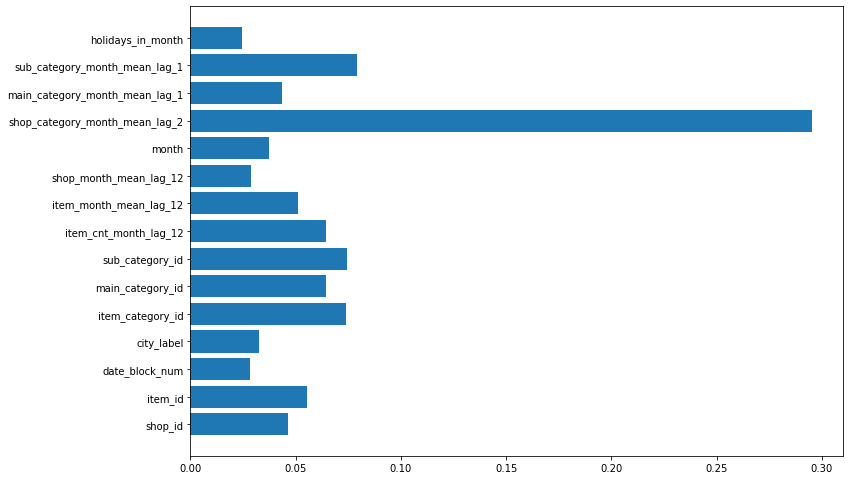

In [156]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

cols = new_train.drop('item_cnt_month', axis = 1).columns
plt.barh(cols, regressor_.feature_importances_)
plt.show()

In [157]:
submission['item_cnt_month'] = predictions
#submission.to_csv('sales_faster_learn.csv', index=False)
#from IPython.display import FileLinks
#FileLinks('.')

NameError: name 'submission' is not defined